In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trading-data/trading_statement_2023.xlsx


In [2]:
data = pd.read_excel("/kaggle/input/trading-data/trading_statement_2023.xlsx", index_col=None)

In [3]:
data.head()

,Symbol,Opening Direction,Closing Time,Entry Price,Closing Price,Closing Quantity,Net $,Balance $
0,NZDUSD,Buy,27/09/2022 08:07:50.147,0.56929,0.56933,0.03,0.02,138.79
1,NZDUSD,Sell,26/08/2022 09:44:15.974,0.62062,0.62108,0.01,-0.50,174.78
2,NZDUSD,Buy,03/08/2022 14:19:04.380,0.62710,0.62238,0.01,-4.76,203.79
3,NZDUSD,Sell,08/08/2022 07:33:08.359,0.62758,0.62645,0.01,1.08,202.86
4,NZDUSD,Sell,18/08/2022 11:38:24.677,0.62598,0.63015,0.01,-4.21,178.16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             253 non-null    object 
 1   Opening Direction  253 non-null    object 
 2   Closing Time       253 non-null    object 
 3   Entry Price        253 non-null    float64
 4   Closing Price      253 non-null    float64
 5   Closing Quantity   253 non-null    float64
 6   Net $              253 non-null    float64
 7   Balance $          253 non-null    float64
dtypes: float64(5), object(3)
memory usage: 15.9+ KB


In [5]:
data.isnull().any()

Symbol               False
Opening Direction    False
Closing Time         False
Entry Price          False
Closing Price        False
Closing Quantity     False
Net $                False
Balance $            False
dtype: bool

In [6]:
data.shape

(253, 8)

In [7]:
data.describe()

,Entry Price,Closing Price,Closing Quantity,Net $,Balance $
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,35.587172,35.556080,0.013834,0.010791,161.894348
std,59.061626,59.009912,0.009125,6.108384,27.634607
min,0.569290,0.569330,0.010000,-17.100000,96.780000
25%,0.890560,0.888590,0.010000,-3.260000,140.350000
50%,1.064780,1.065160,0.010000,-0.860000,161.670000
75%,84.947000,85.166000,0.010000,3.230000,182.370000
max,171.113000,170.244000,0.090000,50.120000,217.840000


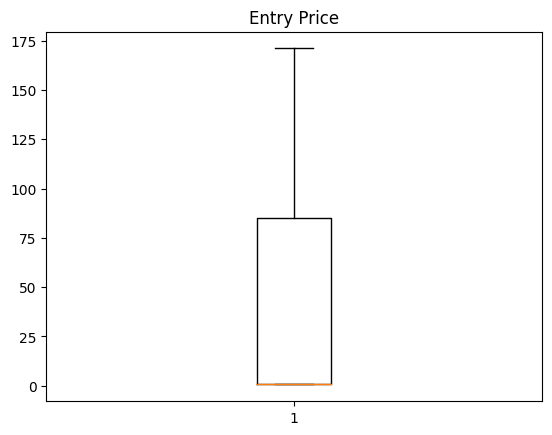

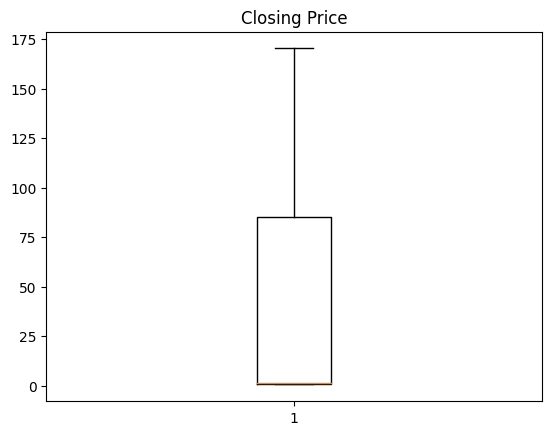

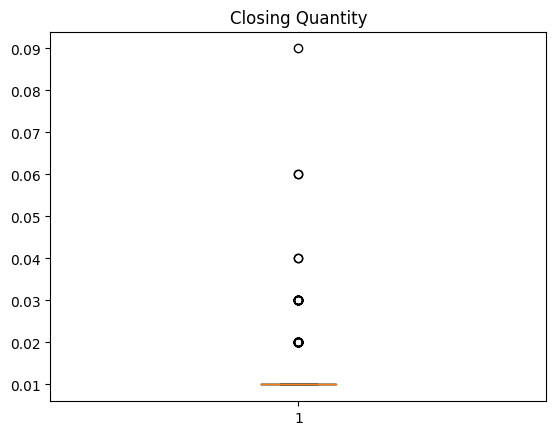

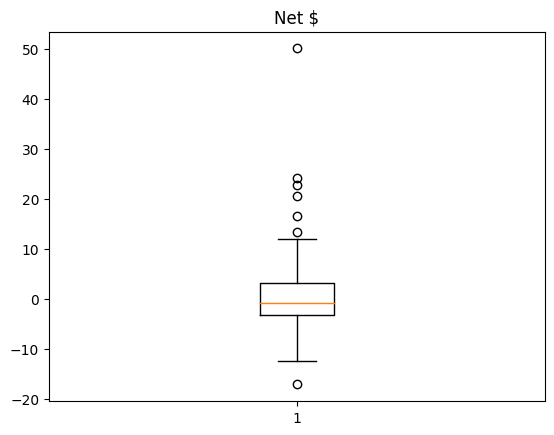

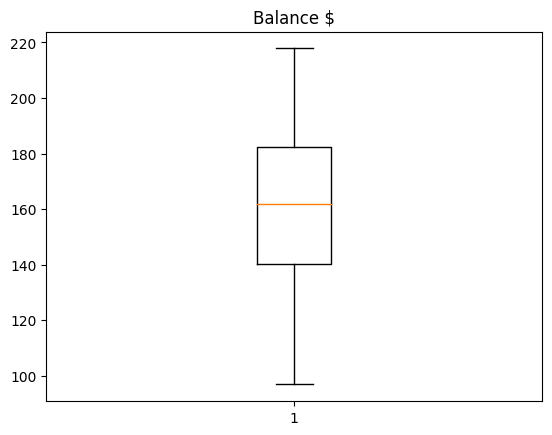

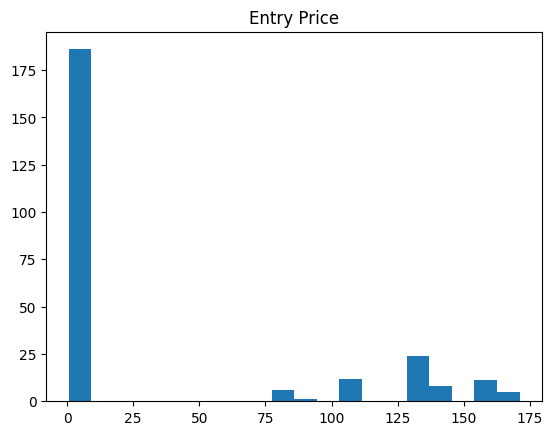

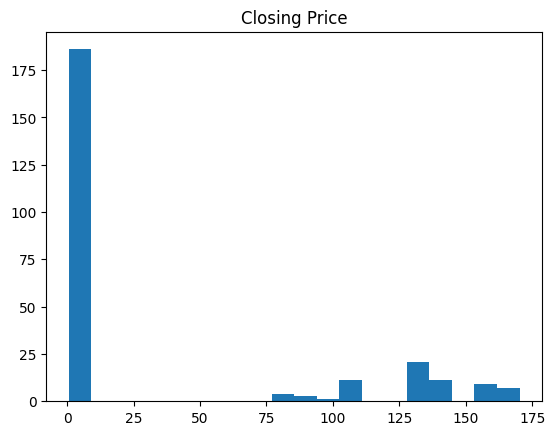

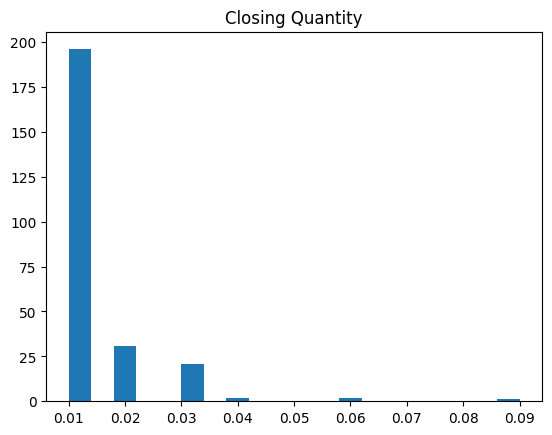

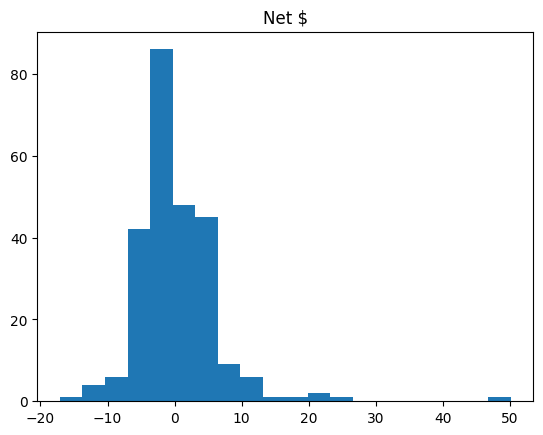

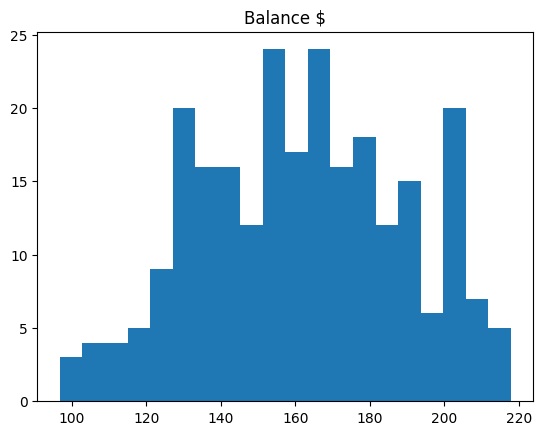

In [8]:
import matplotlib.pyplot as plt
data.columns


# Select the numeric columns
numeric_cols = ['Entry Price', 'Closing Price', 'Closing Quantity', 'Net $', 'Balance $']

# Create boxplots for each numeric column
for col in numeric_cols:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(col)

# Create histograms for each numeric column
for col in numeric_cols:
    plt.figure()
    plt.hist(data[col], bins=20)
    plt.title(col)

# Show the plots
plt.show()

In [9]:
data.head()

,Symbol,Opening Direction,Closing Time,Entry Price,Closing Price,Closing Quantity,Net $,Balance $
0,NZDUSD,Buy,27/09/2022 08:07:50.147,0.56929,0.56933,0.03,0.02,138.79
1,NZDUSD,Sell,26/08/2022 09:44:15.974,0.62062,0.62108,0.01,-0.50,174.78
2,NZDUSD,Buy,03/08/2022 14:19:04.380,0.62710,0.62238,0.01,-4.76,203.79
3,NZDUSD,Sell,08/08/2022 07:33:08.359,0.62758,0.62645,0.01,1.08,202.86
4,NZDUSD,Sell,18/08/2022 11:38:24.677,0.62598,0.63015,0.01,-4.21,178.16


In [10]:
data["Symbol"].value_counts()

EURUSD    38
EURGBP    33
USDCHF    32
USDCAD    27
USDJPY    25
GBPJPY    16
NZDCAD    14
CADJPY    12
EURCAD    10
CADCHF     9
EURAUD     8
NZDJPY     7
EURJPY     7
NZDUSD     7
EURNZD     3
EURCHF     2
AUDCHF     1
AUDUSD     1
AUDNZD     1
Name: Symbol, dtype: int64

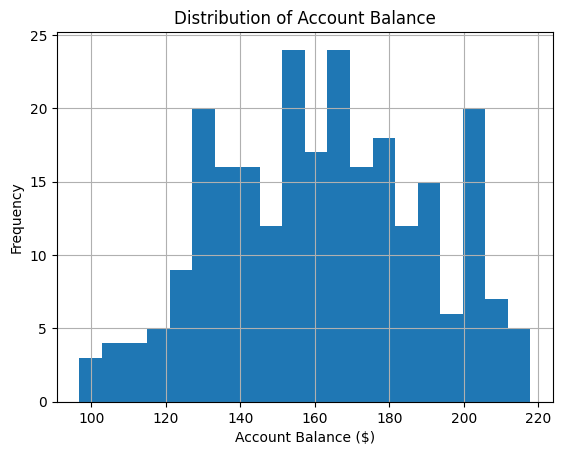

In [11]:
data['Closing Time'] = pd.to_datetime(data['Closing Time'])
data.hist(column='Balance $', bins=20)
 # Set the title and axis labels
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance ($)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [12]:
# See which direction has had more success

avr_direction_success = data.groupby("Opening Direction")["Net $"].mean()

sum_direction_success = data.groupby("Opening Direction")["Net $"].sum()

print("Sum of net:\n", sum_direction_success)
print("\nAverage of net:\n", avr_direction_success)


Sum of net:
 Opening Direction
Buy    -57.24
Sell    59.97
Name: Net $, dtype: float64

Average of net:
 Opening Direction
Buy    -0.561176
Sell    0.397152
Name: Net $, dtype: float64


In [13]:
positive_counts = (data["Net $"] > 0).value_counts()
negative_counts = (data["Net $"] < 0).value_counts()

# print the results
print("Number of positive trades:", positive_counts[True])
print("Number of negative trades:", negative_counts[True])

Number of positive trades: 99
Number of negative trades: 154


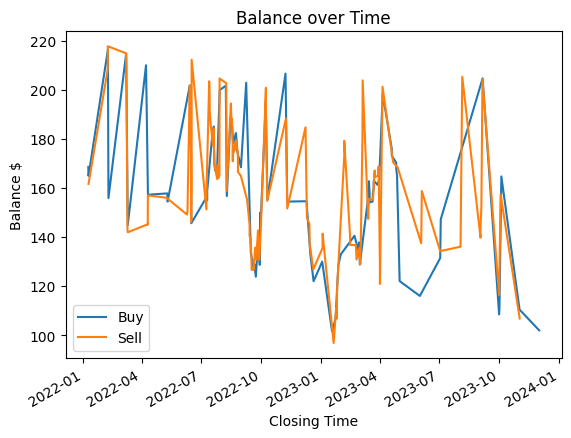

In [14]:
buy_df = data[data['Opening Direction'] == 'Buy']
sell_df = data[data['Opening Direction'] == 'Sell']

fig, ax = plt.subplots()

buy_df.plot(x='Closing Time', y='Balance $', ax=ax, label='Buy')
sell_df.plot(x='Closing Time', y='Balance $', ax=ax, label='Sell')

ax.set_xlabel('Closing Time')
ax.set_ylabel('Balance $')
ax.set_title('Balance over Time')

plt.show()